# <div class='alert alert-info'>Ad details rectifier - ML Classifier</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [3]:
pd.set_option('display.max_rows', None)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv('/Users/rajathadri_as/Documents/CFS - website_ads_ad - 20231226.csv')

In [7]:
df[['price','price_original','cost']]

price  price_original  cost
0        1699500         1699500     0
1        1778500         1778500     0
2        1249500         1249500     0
3        1689500         1689500     0
4        1289500         1289500     0
5        1079500         1079500     0
6        1029500         1029500     0
7        1299500         1299500     0
8        1679500         1679500     0
9              0               0     0
10        899500          899500     0
11        889500          889500     0
12        969500          969500     0
13        879500          879500     0
14       1049500         1049500     0
15             0               0     0
16       7999500         7999500     0
17        490000          490000     0
18       1749500         1749500     0
19        399500          399500     0
20        599600          599600     0
21       1499500         1499500     0
22       1199500         1199500     0
23       1879500         1879500     0
24       1399500         1399500     0
25        829500          829500     0
26             0               0     0
27      13999500        13999500     0
28       7300000         7300000     0
29       3699500         3699500     0
30       5499500         5499500     0
31       3799500         3799500     0
32       7499500         7499500     0
33       1999500         1999500     0
34       1999500         1999500     0
35       3999500         3999500     0
36       2499500         2499500     0
37       3499500         3499500     0
38       3799500         3799500     0
39       5200000         5200000     0
40        500000          500000     0
41          8000            8000     0
42          8000            8000     0
43          8000            8000     0
44          8000            8000     0
45       4788600         4788600     0
46       2499500         2499500     0
47       5600000         5600000     0
48       1999500         1999500  2599
49       2199500         2199500     0
50       2299500         2299500  2599
51       2399500         2399500  2599
52       2499500         2499500  2599
53       2299500         2299500     0
54       2199500         2199500     0
55       2099500         2099500     0
56       2399500         2399500     0
57       2750000         2750000     0
58       2699500         2699500     0
59       2499500         2499500     0
60       1550000         1550000     0
61       1299500         1299500     0
62        799500          799500     0
63       6999500         6999500     0
64       2499500         2499500     0
65       3649500         3649500     0
66       3400000         3400000     0
67        899500          899500     0
68        740000          740000     0
69       3534000         3534000     0
70       3234000         3234000     0
71        549500          549500     0
72        745000          745000     0
73        499500          499500     0
74       3928000         3928000     0
75       3550000         3550000     0
76       2175000         2175000     0
77       3200000         3200000     0
78       1950000         1950000     0
79       2850000         2850000     0
80       1600000         1600000     0
81       4300000         4300000     0
82       3350000         3350000     0
83       3447000         3447000     0
84       2350000         2350000     0
85       1600000         1600000     0
86       3450000         3450000     0
87       3400000         3400000     0
88        950000          950000     0
89       1400000         1400000     0
90       3600000         3600000     0
91       4557000         4557000     0
92       2250000         2250000     0
93       4150000         4150000     0
94       3400000         3400000     0
95       2700000         2700000     0
96       4450000         4450000     0
97       2950000         2950000     0
98       2700000         2700000     0
99       1700000         1700000     0
100      3314500         3314500     0
101      3300000         3300000 

In [8]:
df[df['price'] != df['price_original']]

id  main_id  item_type_id                                  guid  \
639  1110727        0             0  0d82c260-43b1-4e60-836a-b7ea302a127c   

     supertype_id              paa_step1  type_id        type_name  \
639             0  type_id:6;make_id:395        6  Towing Vehicles   

     type_import  cat_id cat_name  subcat_id  subcat_name  altcat_id  \
639            0       0      NaN          0          NaN          0   

     racegroup_id  racegroup_name  race_id  race_name  race_name_id  type_ad  \
639             0             NaN        0        NaN             0        0   

     active  auto_renew  ad_sold           ad_sold_on  unclaimed  product  \
639       1           0        0  0000-00-00 00:00:00          0        0   

     extra_fields  email_magazine     email_magazineon  suspended  \
639           NaN               0  0000-00-00 00:00:00          0   

             suspendedon  user_id          username  hp          hp_start_on  \
639  0000-00-00 00:00:00   159480  completecaravans   0  0000-00-00 00:00:00   

    title  country_id  fad_region_id fad_region_name  fad_county_id  \
639   NaN         219              8   Thames Valley             81   

    fad_county_name  fad_county_name_id  region_id    region_name  \
639     Oxfordshire                   0          8  Thames Valley   

     region_sigla  county_id  county_name  city_id postal_code  \
639           NaN         81  Oxfordshire        0    OX25 3QQ   

                start_on               end_on  never_expires  renew  \
639  2022-01-12 11:20:13  2024-01-02 19:23:05              0      0   

     renewed_from  renewed_to  pre_moderate  post_moderate  yac_number  \
639             0           0             0              0         NaN   

     iovox_number  yac_number_active        yac_number_on  approved  \
639           NaN                  0  0000-00-00 00:00:00         1   

             approvedby           approvedon reject_reason  user_active  \
639  content moderation  2022-01-12 11:20:15           NaN            1   

     almost_expired  almost_expired_date  days  top_ad           top_ad_end  \
639               0  0000-00-00 00:00:00    90       0  0000-00-00 00:00:00   

     top_ad_active  highlighted  blinking  homepage         blinking_end  \
639              0            1         0         0  0000-00-00 00:00:00   

     blinking_active      highlighted_end  highlighted_active  \
639                0  0000-00-00 00:00:00                   1   

            homepage_end  homepage_active           urgent_end  urgent_active  \
639  0000-00-00 00:00:00                0  0000-00-00 00:00:00              0   

     privacy_number  privacy_number_active   privacy_number_end  cost  \
639               0                      0  0000-00-00 00:00:00     0   

     subscribe_premium  payed_type  payed  \
639                  0           0      0   

                                         search_string  \
639  Ssangyong Rexton SX, (2015) Used - Good condit...   

                                               hp_path  hp_width  hp_height  \
639  paa/727/1110727_ssangyong-rexton-sx-2015-used-...       180        130   

                                              hp2_path  hp2_width  hp2_height  \
639  paa/727/1110727_ssangyong-rexton-sx-2015-used-...         70          70   

                                              img_path  img_width  img_height  \
639  paa/727/1110727_ssangyong-rexton-sx-2015-used-...        350         263   

                                         featured_path  featured_width  \
639  paa/727/1110727_ssangyong-rexton-sx-2015-used-...             126   

     featured_height                                         small_path  \
639               96  paa/727/1110727_ssangyong-rexton-sx-2015-used-...   

     small_width  small_height  \
639          120            84   

                                        verysmall_path  verysmall_width  \
639  paa/727/1110727_ssangyong-rexton-sx-2015-used-...        

In [9]:
df.shape

(17816, 364)

In [10]:
df.head(3)

id  main_id  item_type_id guid  supertype_id   paa_step1  type_id  \
0   47589        0             0  NaN             0  type_id:1;        1   
1   47605        0             0  NaN             0  type_id:1;        1   
2  517756        0             0  NaN             0  type_id:1;        1   

          type_name  type_import  cat_id       cat_name  subcat_id  \
0  Touring Caravans            0      76  Conventionals          0   
1  Touring Caravans            0      76  Conventionals          0   
2  Touring Caravans            0      76  Conventionals          0   

   subcat_name  altcat_id  racegroup_id  racegroup_name  race_id  race_name  \
0          NaN          0             0             NaN        0        NaN   
1          NaN          0             0             NaN        0        NaN   
2          NaN          0             0             NaN        0        NaN   

   race_name_id  type_ad  active  auto_renew  ad_sold           ad_sold_on  \
0             0        0       1           0        0  0000-00-00 00:00:00   
1             0        0       1           0        0  0000-00-00 00:00:00   
2             0        0       1           0        0  0000-00-00 00:00:00   

   unclaimed  product  extra_fields  email_magazine     email_magazineon  \
0          0        0           NaN               0  0000-00-00 00:00:00   
1          0        0           NaN               0  0000-00-00 00:00:00   
2          0        0           NaN               0  0000-00-00 00:00:00   

   suspended          suspendedon  user_id       username  hp  \
0          0  0000-00-00 00:00:00   162317  johndoe177863   1   
1          0  0000-00-00 00:00:00   162317  johndoe177863   0   
2          0  0000-00-00 00:00:00   162317  johndoe177863   1   

           hp_start_on                                              title  \
0  2015-06-25 12:41:51  Bailey Unicorn Valencia 4 berth, (2012) Tourin...   
1  0000-00-00 00:00:00  Swift Challenger 565SE 4 berth, (2013) Touring...   
2  2015-08-14 07:50:27  Swift Charisma 550 4 berth, (2010) Touring Car...   

   country_id  fad_region_id fad_region_name  fad_county_id fad_county_name  \
0         219              0             NaN              0             NaN   
1         219              0             NaN              0             NaN   
2         219              0             NaN              0             NaN   

   fad_county_name_id  region_id region_name  region_sigla  county_id  \
0                   0          3       Wales           NaN        187   
1                   0          3       Wales           NaN        187   
2                   0          3       Wales           NaN        187   

     county_name  city_id postal_code             start_on  \
0  Pembrokeshire    38812     SA4 9RU  2015-06-25 12:41:51   
1  Pembrokeshire    38812     SA4 9RU  2015-06-26 06:22:52   
2  Pembrokeshire    38812         NaN  2015-08-14 07:50:27   

                end_on  never_expires  renew  renewed_from  renewed_to  \
0  2024-01-02 21:23:03              1      0             0           0   
1  2024-01-02 17:23:05              1      0             0           0   
2  2023-12-31 11:23:03              1      0             0           0   

   pre_moderate  post_moderate  yac_number  iovox_number  yac_number_active  \
0             0              1         NaN           NaN                  0   
1             0              1         NaN           NaN                  0   
2             0              1         NaN           NaN                  0   

         yac_number_on  approved approvedby           approvedon  \
0  0000-00-00 00:00:00         1        NaN  0000-00-00 00:00:00   
1  0000-00-00 00:00:00         1        NaN  0000-00-00 00:00:00   
2  0000-00-00 00:00:00         1        NaN  0000-00-00 00:00:00   

  reject_reason  user_active  almost_expired  almost_expired_date  days  \
0           NaN            1               0  0000-00-00 00:00:00    30   
1           NaN     

In [ ]:
df[['make_name','model_name','berth','year','newused','length','width']]

In [ ]:
df_demo = df[df['berth'].isnull()]

In [ ]:
df_demo.shape

In [ ]:
df_demo[['type_name','berth','cat_name']].head(500)

In [11]:
df=df[['title','type_name','type_id','cat_name','cat_id','price','make_name','model_name','berth','year','newused']]

In [12]:
df.head()

title         type_name  \
0  Bailey Unicorn Valencia 4 berth, (2012) Tourin...  Touring Caravans   
1  Swift Challenger 565SE 4 berth, (2013) Touring...  Touring Caravans   
2  Swift Charisma 550 4 berth, (2010) Touring Car...  Touring Caravans   
3  Swift Conqueror 565 4 berth, (2012) Touring Ca...  Touring Caravans   
4  Bailey Senator California 4 berth, (2009) Tour...  Touring Caravans   

   type_id       cat_name  cat_id    price make_name          model_name  \
0        1  Conventionals      76  1699500    Bailey    Unicorn Valencia   
1        1  Conventionals      76  1778500     Swift    Challenger 565SE   
2        1  Conventionals      76  1249500     Swift        Charisma 550   
3        1  Conventionals      76  1689500     Swift       Conqueror 565   
4        1  Conventionals      76  1289500    Bailey  Senator California   

  berth  year newused  
0     4  2012     NaN  
1     4  2013     NaN  
2     4  2010     NaN  
3     4  2012     NaN  
4     4  2009     NaN

In [13]:
df.isna().sum()

title         5047
type_name        0
type_id          0
cat_name      7976
cat_id           0
price            0
make_name      937
model_name    1066
berth         4340
year          2070
newused       8390
dtype: int64

In [14]:
df.shape

(17816, 11)

In [ ]:
# df.dropna(subset=['title'], inplace=True)

In [ ]:
df['type_name'].value_counts()

In [ ]:
df['type_id'].value_counts()

### Data Cleaning

In [15]:
df['title'].fillna('Nil', inplace=True)

In [16]:
df['newused'].fillna('Nil', inplace=True)

In [17]:
df.dropna(subset=['berth'], inplace=True)

In [18]:
df.dropna(subset=['cat_name'], inplace=True)

In [19]:
df.dropna(subset=['year','make_name','model_name'], inplace=True)

In [20]:
df.isna().sum()

title         0
type_name     0
type_id       0
cat_name      0
cat_id        0
price         0
make_name     0
model_name    0
berth         0
year          0
newused       0
dtype: int64

In [21]:
df.shape

(6669, 11)

In [ ]:
df['cat_id'].unique()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6669 entries, 0 to 17814
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       6669 non-null   object
 1   type_name   6669 non-null   object
 2   type_id     6669 non-null   int64 
 3   cat_name    6669 non-null   object
 4   cat_id      6669 non-null   int64 
 5   price       6669 non-null   int64 
 6   make_name   6669 non-null   object
 7   model_name  6669 non-null   object
 8   berth       6669 non-null   object
 9   year        6669 non-null   object
 10  newused     6669 non-null   object
dtypes: int64(3), object(8)
memory usage: 625.2+ KB


In [ ]:
df['berth'].value_counts()

In [23]:
df.loc[df['berth'] == '1 berth', 'berth'] = '1'
df.loc[df['berth'] == '3 berth', 'berth'] = '3'
df.loc[df['berth'] == '2 berth', 'berth'] = '2'
df.loc[df['berth'] == '4 berth', 'berth'] = '4'
df.loc[df['berth'] == '6 berth', 'berth'] = '6'
df.loc[df['berth'] == '5 berth', 'berth'] = '5'
df.loc[df['berth'] == '7 berth', 'berth'] = '7'
df.loc[df['berth'] == '> 7 berth', 'berth'] = '7' 

In [24]:
df['berth'] = df['berth'].astype('int64')

In [25]:
df['berth'].value_counts()

berth
4     3054
6     1548
2     1157
3      357
7      262
5      251
8       34
1        4
10       1
47       1
Name: count, dtype: int64

In [26]:
df = df[~df['year'].isin(['2011 (61)', 'WA15 ATO','s @ 10.4%','2009 (09)','2007 (07)','2011 (11)','2008 (08)','2007 (57)','2004 (04)','2016 (16)','2014 (14)','FY22LCX','CU21AOC','2009 (58)','2007 (56)','2013 (13)','2012 (12)','2006 (56)','KE22HKD','RF57CXX','2006 (06)','VU22YXG','CV61 BZD','MF71RNN','YJ22EPP','CU58EHT','GU16HRF','CU22BNX','2010 (10)','CV23JVD','CU70EAC','NK16AXG','CU66AKG','2003 (53)','2008 (58)','JC12NET','YJ23CHG','YJ20BRV','YJ22 EPN','CN22EHE','2015 (15)','CU70EAG','BV16XRC','2014 (63)','2010 (60)','2019 (19)','2005 (05)','2014 (64)','2016 (66)','CU18BSV','CN09CLU','X8SDJ','CU14DWK','CU17AYJ','CU22BNZ','2011 (61)'])]

In [27]:
df['year'] = df['year'].astype('int64')
df['price'] = df['price'].astype('int64')

In [28]:
df['newused'].value_counts()

newused
Nil                                 3024
Used - Good condition               1591
Used                                1135
New                                  328
Brand new                            320
Used - Average condition for age     116
Pre-loved                             90
Pre-owned                             56
Used - Poor condition                  4
Used - Spare parts or repair           3
used                                   2
Name: count, dtype: int64

In [29]:
df.loc[df['newused'] == 'Used', 'newused'] = 'Used - Good condition'
df.loc[df['newused'] == 'New', 'newused'] = 'Brand new'
df.loc[df['newused'] == 'Pre-owned', 'newused'] = 'Used - Good condition'
df.loc[df['newused'] == 'Pre-loved', 'newused'] = 'Used - Poor condition'
df.loc[df['newused'] == 'used', 'newused'] = 'Used - Good condition'

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6669 entries, 0 to 17814
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       6669 non-null   object
 1   type_name   6669 non-null   object
 2   type_id     6669 non-null   int64 
 3   cat_name    6669 non-null   object
 4   cat_id      6669 non-null   int64 
 5   price       6669 non-null   int64 
 6   make_name   6669 non-null   object
 7   model_name  6669 non-null   object
 8   berth       6669 non-null   int64 
 9   year        6669 non-null   int64 
 10  newused     6669 non-null   object
dtypes: int64(5), object(6)
memory usage: 625.2+ KB


In [31]:
df.shape

(6669, 11)

In [32]:
df.head()

title         type_name  \
0  Bailey Unicorn Valencia 4 berth, (2012) Tourin...  Touring Caravans   
1  Swift Challenger 565SE 4 berth, (2013) Touring...  Touring Caravans   
2  Swift Charisma 550 4 berth, (2010) Touring Car...  Touring Caravans   
3  Swift Conqueror 565 4 berth, (2012) Touring Ca...  Touring Caravans   
4  Bailey Senator California 4 berth, (2009) Tour...  Touring Caravans   

   type_id       cat_name  cat_id    price make_name          model_name  \
0        1  Conventionals      76  1699500    Bailey    Unicorn Valencia   
1        1  Conventionals      76  1778500     Swift    Challenger 565SE   
2        1  Conventionals      76  1249500     Swift        Charisma 550   
3        1  Conventionals      76  1689500     Swift       Conqueror 565   
4        1  Conventionals      76  1289500    Bailey  Senator California   

   berth  year newused  
0      4  2012     Nil  
1      4  2013     Nil  
2      4  2010     Nil  
3      4  2012     Nil  
4      4  2009     Nil

<Axes: xlabel='type_name'>

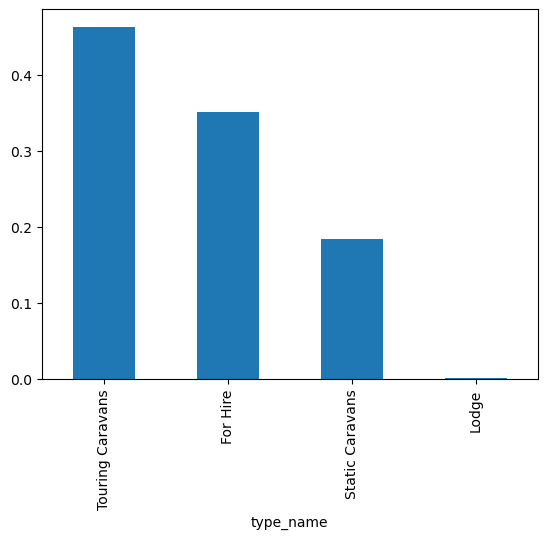

In [33]:
df['type_name'].value_counts(normalize = True).plot.bar()

<Axes: xlabel='cat_name'>

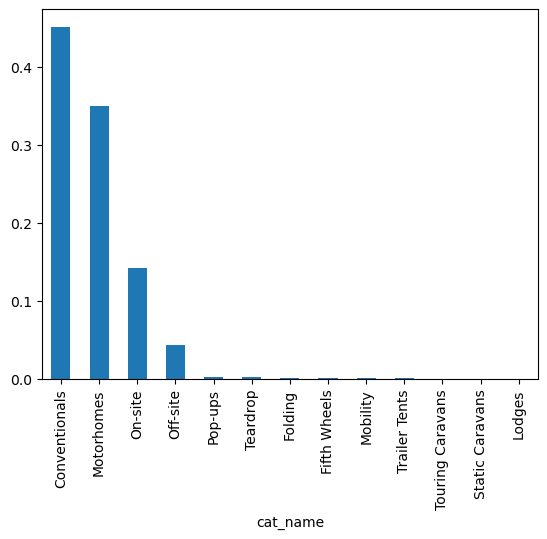

In [34]:
df['cat_name'].value_counts(normalize = True).plot.bar()

# <div class = 'alert alert-info'>NLTK text processing</div>

In [35]:
import nltk
nltk.download('all')

[nltk_data] Error loading all: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [36]:
# preprocessing loop
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [37]:
# create a list text
text = list(df['title'])

In [38]:
corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z0-9\s]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [39]:
corpus

['bailey unicorn valencia 4 berth 2012 touring caravan sale',
 'swift challenger 565se 4 berth 2013 touring caravan sale',
 'swift charisma 550 4 berth 2010 touring caravan sale',
 'swift conqueror 565 4 berth 2012 touring caravan sale',
 'bailey senator california 4 berth 2009 touring caravan sale',
 'elddis odyssey 544 4 berth 2008 touring caravan sale',
 'swift challenger 490 5 berth 2006 touring caravan sale',
 'bailey olympus 534 4 berth 2011 touring caravan sale',
 'swift challenger sport 584 4 berth 2013 touring caravan sale',
 'avondale avocet 4 berth 2008 touring caravan sale',
 'bessacarr cameo 525 3 berth 2006 touring caravan sale',
 'ace firestar 4 berth 2007 touring caravan sale',
 'bailey senator series 6 indiana 4 berth 2008 touring caravan sale',
 'fleetwood colchester 380 2 berth 2001 touring caravan sale',
 'nil',
 'compass rallye 500 4 4 berth 2001 touring caravan sale',
 'coachman vision 565 4 berth 2014 touring caravan sale',
 'sterling europa 390 2 berth 2001 tour

In [40]:
#assign corpus to df
df['title'] = corpus
df.head()

title         type_name  \
0  bailey unicorn valencia 4 berth 2012 touring c...  Touring Caravans   
1  swift challenger 565se 4 berth 2013 touring ca...  Touring Caravans   
2  swift charisma 550 4 berth 2010 touring carava...  Touring Caravans   
3  swift conqueror 565 4 berth 2012 touring carav...  Touring Caravans   
4  bailey senator california 4 berth 2009 touring...  Touring Caravans   

   type_id       cat_name  cat_id    price make_name          model_name  \
0        1  Conventionals      76  1699500    Bailey    Unicorn Valencia   
1        1  Conventionals      76  1778500     Swift    Challenger 565SE   
2        1  Conventionals      76  1249500     Swift        Charisma 550   
3        1  Conventionals      76  1689500     Swift       Conqueror 565   
4        1  Conventionals      76  1289500    Bailey  Senator California   

   berth  year newused  
0      4  2012     Nil  
1      4  2013     Nil  
2      4  2010     Nil  
3      4  2012     Nil  
4      4  2009     Nil

In [41]:
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

In [42]:
df['title'] = df['title'].apply(lemmatize_words)

In [43]:
df.head()

title         type_name  \
0  bailey unicorn valencia 4 berth 2012 tour cara...  Touring Caravans   
1  swift challenger 565se 4 berth 2013 tour carav...  Touring Caravans   
2  swift charisma 550 4 berth 2010 tour caravan sale  Touring Caravans   
3  swift conqueror 565 4 berth 2012 tour caravan ...  Touring Caravans   
4  bailey senator california 4 berth 2009 tour ca...  Touring Caravans   

   type_id       cat_name  cat_id    price make_name          model_name  \
0        1  Conventionals      76  1699500    Bailey    Unicorn Valencia   
1        1  Conventionals      76  1778500     Swift    Challenger 565SE   
2        1  Conventionals      76  1249500     Swift        Charisma 550   
3        1  Conventionals      76  1689500     Swift       Conqueror 565   
4        1  Conventionals      76  1289500    Bailey  Senator California   

   berth  year newused  
0      4  2012     Nil  
1      4  2013     Nil  
2      4  2010     Nil  
3      4  2012     Nil  
4      4  2009     Nil

In [44]:
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

In [45]:
df['title'] = df['title'].apply(ps.stem)

In [46]:
df[['type_id','type_name']].value_counts()

type_id  type_name       
1        Touring Caravans    3088
10       For Hire            2343
2        Static Caravans     1225
3        Lodge                 13
Name: count, dtype: int64

In [47]:
df.head()

title         type_name  \
0  bailey unicorn valencia 4 berth 2012 tour cara...  Touring Caravans   
1  swift challenger 565se 4 berth 2013 tour carav...  Touring Caravans   
2   swift charisma 550 4 berth 2010 tour caravan sal  Touring Caravans   
3  swift conqueror 565 4 berth 2012 tour caravan sal  Touring Caravans   
4  bailey senator california 4 berth 2009 tour ca...  Touring Caravans   

   type_id       cat_name  cat_id    price make_name          model_name  \
0        1  Conventionals      76  1699500    Bailey    Unicorn Valencia   
1        1  Conventionals      76  1778500     Swift    Challenger 565SE   
2        1  Conventionals      76  1249500     Swift        Charisma 550   
3        1  Conventionals      76  1689500     Swift       Conqueror 565   
4        1  Conventionals      76  1289500    Bailey  Senator California   

   berth  year newused  
0      4  2012     Nil  
1      4  2013     Nil  
2      4  2010     Nil  
3      4  2012     Nil  
4      4  2009     Nil

In [48]:
# create a list text
text = list(df['newused'])

In [49]:
corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z0-9\s]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [50]:
corpus

['nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'used good condition',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'nil',
 'brand new',
 'used good condition',
 'used average condition age',
 'used good condition',
 'brand new',
 'brand new',
 'brand new',
 'brand new',
 'brand new',
 'brand new',
 'used good condition',
 'used good condition',
 'used good condition',
 'brand new',
 'brand new',
 'nil',
 'used good condition',
 'used good condition',
 'used good condition',
 'used good condition',
 'used good condition',
 'used good condition',
 'brand new',
 'brand new',
 'used good condition',
 'brand new',
 'brand new',
 'used good condition',
 'brand new',
 'brand new',
 'brand new',
 'brand new',
 'used good condition',
 'brand new',
 'used good condition',
 'used good condition',
 'used good condition',
 'used good condition',
 'brand new',
 'brand new',
 'brand new',
 'brand new',
 'brand new',

In [51]:
#assign corpus to df
df['newused'] = corpus
df.head()

title         type_name  \
0  bailey unicorn valencia 4 berth 2012 tour cara...  Touring Caravans   
1  swift challenger 565se 4 berth 2013 tour carav...  Touring Caravans   
2   swift charisma 550 4 berth 2010 tour caravan sal  Touring Caravans   
3  swift conqueror 565 4 berth 2012 tour caravan sal  Touring Caravans   
4  bailey senator california 4 berth 2009 tour ca...  Touring Caravans   

   type_id       cat_name  cat_id    price make_name          model_name  \
0        1  Conventionals      76  1699500    Bailey    Unicorn Valencia   
1        1  Conventionals      76  1778500     Swift    Challenger 565SE   
2        1  Conventionals      76  1249500     Swift        Charisma 550   
3        1  Conventionals      76  1689500     Swift       Conqueror 565   
4        1  Conventionals      76  1289500    Bailey  Senator California   

   berth  year newused  
0      4  2012     nil  
1      4  2013     nil  
2      4  2010     nil  
3      4  2012     nil  
4      4  2009     nil

In [52]:
# create a list text
text = list(df['make_name'])

In [53]:
corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z0-9\s]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [54]:
corpus

['bailey',
 'swift',
 'swift',
 'swift',
 'bailey',
 'elddis',
 'swift',
 'bailey',
 'swift',
 'avondale',
 'bessacarr',
 'ace',
 'bailey',
 'fleetwood',
 '',
 'compass',
 'coachman',
 'sterling',
 'compass',
 'swift',
 'swift',
 'lunar',
 'bailey',
 'bailey',
 'willerby',
 'adria',
 'adria',
 'adria',
 'adria',
 'uk',
 'uk',
 'uk',
 'uk',
 'uk',
 'bk bluebird',
 'willerby',
 'willerby',
 'carabuild',
 'uk',
 'willerby',
 'pine log',
 'abi',
 'bailey',
 'avondale',
 'swift',
 'bessacarr',
 'atlas',
 'willerby',
 'carnaby',
 'willerby',
 'willerby',
 'willerby',
 'willerby',
 'willerby',
 'willerby',
 'willerby',
 'cosalt',
 'europa',
 'abi',
 '',
 'cosalt',
 'abi',
 'europa',
 'willerby',
 'atlas',
 'willerby',
 'atlas',
 'willerby',
 'atlas',
 'willerby',
 'willerby',
 'willerby',
 'willerby',
 'atlas',
 'europa',
 'willerby',
 'willerby',
 'abi',
 'willerby',
 'abi',
 'swift',
 'willerby',
 'willerby',
 'europa',
 'willerby',
 'europa',
 'willerby',
 'atlas',
 'willerby',
 'willerby'

In [55]:
#assign corpus to df
df['make_name'] = corpus
df.head()

title         type_name  \
0  bailey unicorn valencia 4 berth 2012 tour cara...  Touring Caravans   
1  swift challenger 565se 4 berth 2013 tour carav...  Touring Caravans   
2   swift charisma 550 4 berth 2010 tour caravan sal  Touring Caravans   
3  swift conqueror 565 4 berth 2012 tour caravan sal  Touring Caravans   
4  bailey senator california 4 berth 2009 tour ca...  Touring Caravans   

   type_id       cat_name  cat_id    price make_name          model_name  \
0        1  Conventionals      76  1699500    bailey    Unicorn Valencia   
1        1  Conventionals      76  1778500     swift    Challenger 565SE   
2        1  Conventionals      76  1249500     swift        Charisma 550   
3        1  Conventionals      76  1689500     swift       Conqueror 565   
4        1  Conventionals      76  1289500    bailey  Senator California   

   berth  year newused  
0      4  2012     nil  
1      4  2013     nil  
2      4  2010     nil  
3      4  2012     nil  
4      4  2009     nil

In [56]:
# create a list text
text = list(df['model_name'])

In [57]:
corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z0-9\s]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [58]:
corpus

['unicorn valencia',
 'challenger 565se',
 'charisma 550',
 'conqueror 565',
 'senator california',
 'odyssey 544',
 'challenger 490',
 'olympus 534',
 'challenger sport 584',
 'avocet',
 'cameo 525',
 'firestar',
 'senator series 6 indiana',
 'colchester 380',
 'pec qubec',
 'rallye 500 4',
 'vision 565',
 'europa 390',
 'rallye 524',
 'challenger 570 sr',
 'challenger 540',
 'quasar 556',
 'pageant series 5 auvergne',
 'unicorn valencia',
 'clearwater',
 'twin500',
 'matrix 590sgt',
 'sport 660dp',
 'sunliving a35sp',
 'oakwood',
 'grangewood lodge',
 'oakwood light lodge',
 'torthwood lodge',
 'oakwood',
 'senator',
 'vouge',
 'sailsbury',
 'signature deluxe lodge',
 'pinewood lodge',
 'martin',
 'avoset',
 'brisbane',
 'senator vermont',
 '540 4',
 '555 fixed bed',
 'twin axell',
 'debonaire 5',
 'winchester',
 'melrose',
 'sierra',
 'rio gold',
 'rio',
 'winchester',
 'canterbury 2 bedroom',
 'skye',
 'wold',
 'capri super',
 'mulberry',
 'westwood',
 'b brisbane',
 'resort',
 'am

In [59]:
df['price'] = df['price']/100

In [60]:
df['price'] = df['price'].astype('int64')

In [61]:
#assign corpus to df
df['model_name'] = corpus
df.head()

title         type_name  \
0  bailey unicorn valencia 4 berth 2012 tour cara...  Touring Caravans   
1  swift challenger 565se 4 berth 2013 tour carav...  Touring Caravans   
2   swift charisma 550 4 berth 2010 tour caravan sal  Touring Caravans   
3  swift conqueror 565 4 berth 2012 tour caravan sal  Touring Caravans   
4  bailey senator california 4 berth 2009 tour ca...  Touring Caravans   

   type_id       cat_name  cat_id  price make_name          model_name  berth  \
0        1  Conventionals      76  16995    bailey    unicorn valencia      4   
1        1  Conventionals      76  17785     swift    challenger 565se      4   
2        1  Conventionals      76  12495     swift        charisma 550      4   
3        1  Conventionals      76  16895     swift       conqueror 565      4   
4        1  Conventionals      76  12895    bailey  senator california      4   

   year newused  
0  2012     nil  
1  2013     nil  
2  2010     nil  
3  2012     nil  
4  2009     nil

# <div class = 'alert alert-info'>Feature Engineering</div>

### Null Check

In [62]:
df.isnull().sum()

title         0
type_name     0
type_id       0
cat_name      0
cat_id        0
price         0
make_name     0
model_name    0
berth         0
year          0
newused       0
dtype: int64

### Outliers

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6669 entries, 0 to 17814
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       6669 non-null   object
 1   type_name   6669 non-null   object
 2   type_id     6669 non-null   int64 
 3   cat_name    6669 non-null   object
 4   cat_id      6669 non-null   int64 
 5   price       6669 non-null   int64 
 6   make_name   6669 non-null   object
 7   model_name  6669 non-null   object
 8   berth       6669 non-null   int64 
 9   year        6669 non-null   int64 
 10  newused     6669 non-null   object
dtypes: int64(5), object(6)
memory usage: 625.2+ KB


In [64]:
df.describe().T

count          mean           std   min     25%      50%      75%  \
type_id  6669.0      4.349528      4.175195   1.0     1.0      2.0     10.0   
cat_id   6669.0     67.911681      8.028285  56.0    58.0     67.0     76.0   
price    6669.0  18303.640426  61793.365255   0.0   121.0  11500.0  22000.0   
berth    6669.0      4.245164      1.541768   1.0     4.0      4.0      6.0   
year     6669.0   2014.774479     25.581869   0.0  2011.0   2016.0   2020.0   

               max  
type_id       10.0  
cat_id        76.0  
price    4500000.0  
berth         47.0  
year        2029.0

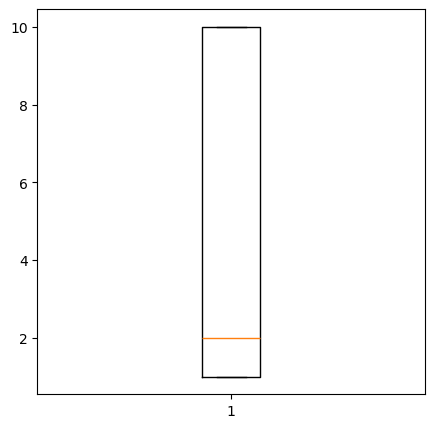

In [65]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['type_id'])
plt.show()

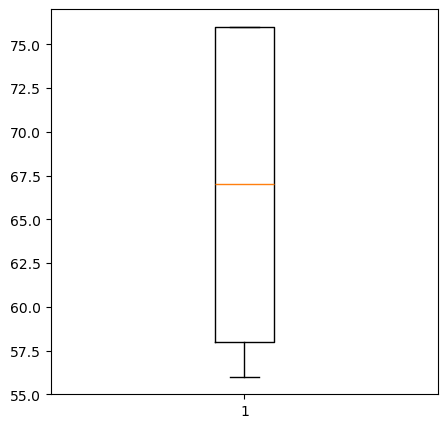

In [66]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['cat_id'])
plt.show()

In [67]:
df = df[df['price'] <= 400000]

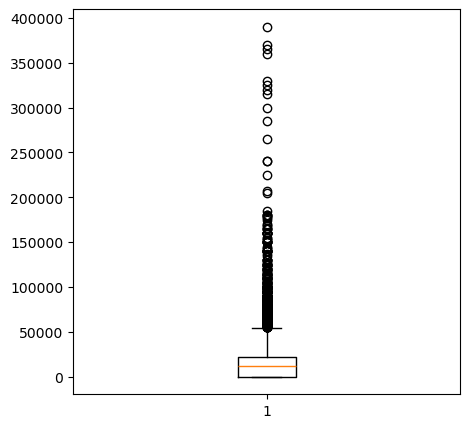

In [68]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['price'])
plt.show()

In [69]:
df= df[df['berth'] <= 8]

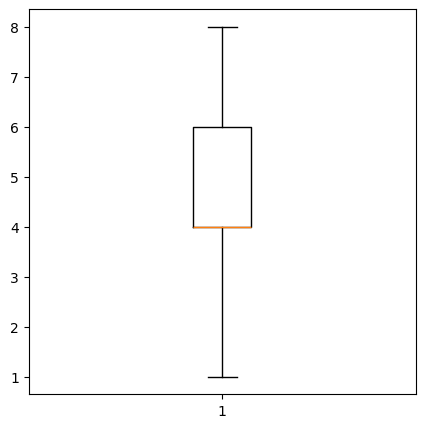

In [70]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['berth'])
plt.show()

In [71]:
df = df[df['year'] >= 1750]

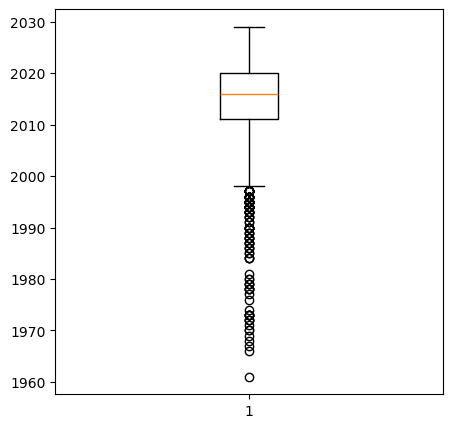

In [72]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['year'])
plt.show()

###### <div class = 'alert alert-danger'>All outliers are removed except for price and year, since these provide valid information</div>

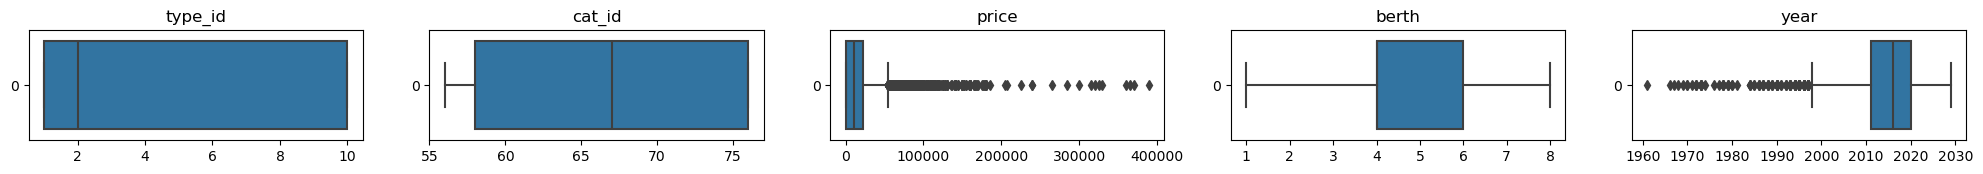

In [73]:
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)
  
  # Create a box plot of the current column's data
  sns.boxplot(df[item], orient = 'h')
  
  # Add the column name to the subplot title
  plt.title(item)
  
  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

###### <div class = 'alert alert-danger'>Skewness doesn't matter for classification algorithms</div>

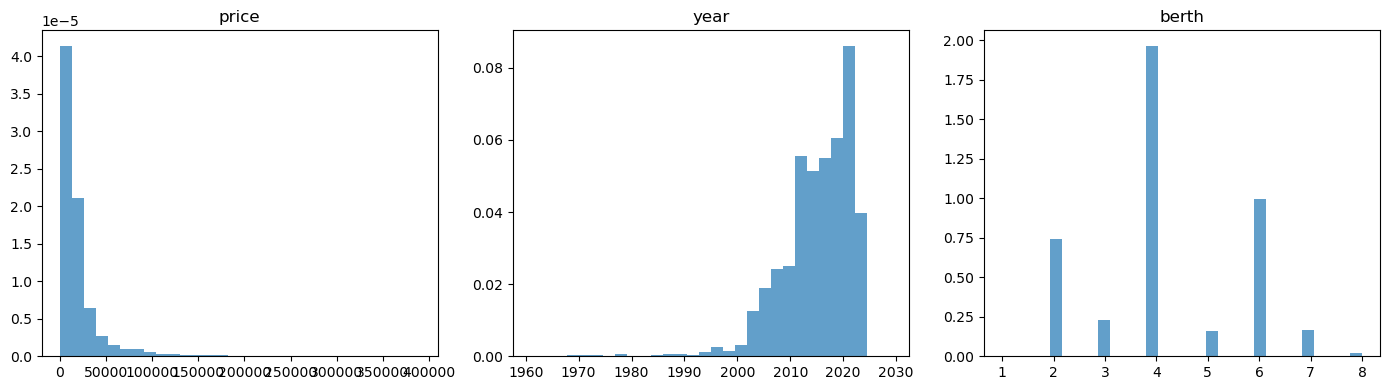

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
axs[0].hist(df['price'], bins=30, density=True, alpha=0.7)
axs[0].set_title("price")
axs[1].hist(df['year'], bins=30, density=True, alpha=0.7)
axs[1].set_title("year")
axs[2].hist(df['berth'], bins=30, density=True, alpha=0.7)
axs[2].set_title("berth")
plt.tight_layout()
plt.show()

###### <div class = 'alert alert-danger'>Categorical Encoding</div>

In [ ]:
df[['title','type_id','cat_id','price','make_name','model_name','berth','year','newused']]

In [ ]:
df['make_name'].nunique()

In [ ]:
df['model_name'].nunique()

In [ ]:
df['newused'].nunique()

In [ ]:
df['newused'].unique()

In [ ]:
df['newused'].value_counts()

In [140]:
label_encoder = LabelEncoder()

In [141]:
df['newused']= label_encoder.fit_transform(df['newused']) 

In [142]:
df['newused'].unique()

array([1, 3, 0, 2, 4, 5])

In [143]:
df['newused'].value_counts()

newused
1    3022
3    2780
0     648
2     116
4      94
5       3
Name: count, dtype: int64

In [ ]:
# 1 - Nil
# 3 - used good condition
# 0 - brand new
# 2 - used average confition age
# 4 - used poor condition
# 5 - used spare part repair

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6663 entries, 0 to 17814
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       6663 non-null   object
 1   type_name   6663 non-null   object
 2   type_id     6663 non-null   int64 
 3   cat_name    6663 non-null   object
 4   cat_id      6663 non-null   int64 
 5   price       6663 non-null   int64 
 6   make_name   6663 non-null   object
 7   model_name  6663 non-null   object
 8   berth       6663 non-null   int64 
 9   year        6663 non-null   int64 
 10  newused     6663 non-null   int32 
dtypes: int32(1), int64(5), object(5)
memory usage: 856.7+ KB


In [145]:
df.head()

title         type_name  \
0  bailey unicorn valencia 4 berth 2012 tour cara...  Touring Caravans   
1  swift challenger 565se 4 berth 2013 tour carav...  Touring Caravans   
2   swift charisma 550 4 berth 2010 tour caravan sal  Touring Caravans   
3  swift conqueror 565 4 berth 2012 tour caravan sal  Touring Caravans   
4  bailey senator california 4 berth 2009 tour ca...  Touring Caravans   

   type_id       cat_name  cat_id  price make_name          model_name  berth  \
0        1  Conventionals      76  16995    bailey    unicorn valencia      4   
1        1  Conventionals      76  17785     swift    challenger 565se      4   
2        1  Conventionals      76  12495     swift        charisma 550      4   
3        1  Conventionals      76  16895     swift       conqueror 565      4   
4        1  Conventionals      76  12895    bailey  senator california      4   

   year  newused  
0  2012        1  
1  2013        1  
2  2010        1  
3  2012        1  
4  2009        1

In [ ]:
Break Auto Execution

In [150]:
df.describe().T

count          mean           std     min     25%      50%      75%  \
type_id  6663.0      4.350893      4.175697     1.0     1.0      2.0     10.0   
cat_id   6663.0     67.913552      8.029649    56.0    58.0     67.0     76.0   
price    6663.0  17496.021162  27376.222602     0.0   121.0  11495.0  22000.0   
berth    6663.0      4.238331      1.448689     1.0     4.0      4.0      6.0   
year     6663.0   2015.073090      6.751601  1961.0  2011.0   2016.0   2020.0   
newused  6663.0      1.798739      1.131354     0.0     1.0      1.0      3.0   

              max  
type_id      10.0  
cat_id       76.0  
price    389995.0  
berth         8.0  
year       2029.0  
newused       5.0

---

# <div class = 'alert alert-info'>Modeling - Ad Type</div>

In [151]:
X = df[['type_id','cat_id','berth','year','newused']]
y = df[[
        'make_name'
       ]]

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [153]:
X_train.shape

(5330, 5)

In [154]:
X_test.shape

(1333, 5)

In [155]:
y_train.shape

(5330, 1)

In [156]:
y_test.shape

(1333, 1)

# <div class = 'alert alert-success'> Logistic - Pipeline - MultiOutput</div>

In [82]:
from sklearn.linear_model import LogisticRegression

In [85]:
numerical_features = ['type_id','cat_id','year','berth']
categorical_features = ['newused']

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6663 entries, 0 to 17814
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       6663 non-null   object
 1   type_name   6663 non-null   object
 2   type_id     6663 non-null   int64 
 3   cat_name    6663 non-null   object
 4   cat_id      6663 non-null   int64 
 5   price       6663 non-null   int64 
 6   make_name   6663 non-null   object
 7   model_name  6663 non-null   object
 8   berth       6663 non-null   int64 
 9   year        6663 non-null   int64 
 10  newused     6663 non-null   object
dtypes: int64(5), object(6)
memory usage: 882.7+ KB


In [125]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [126]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

In [127]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features)
    ],
    remainder='passthrough'
)

In [133]:
model = RandomForestClassifier(random_state=42)

In [134]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [135]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

cv_scores

array([0.29080675, 0.28893058, 0.28142589, 0.28424015, 0.28330206])

In [136]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['type_id', 'cat_id', 'year',
                                                   'berth']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['newused'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [137]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('accuracy = ',accuracy)

accuracy =  0.2873218304576144


In [138]:
pipe_lr = Pipeline(steps=[('cv',TfidfVectorizer(analyzer='word',stop_words= 'english')),
                          ('lr_multi',MultiOutputClassifier(
                              GridSearchCV(LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200]}, cv=5)
                              ))]
                  )

In [139]:
pipe_lr.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [5, 5330]

In [101]:
pipe_lr.score(X_train,y_train)

NotFittedError: This MultiOutputClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
pipe_lr.score(X_test,y_test)

In [ ]:
pred1 = 'Conventional carrier 2009 model'

In [ ]:
pipe_lr.predict([pred1])

In [ ]:
pipe_lr.predict_proba([pred1])

In [ ]:
# Save the model to a file using pickle
filename = 'CFS_MLclassifier_Type.pkl'
with open(filename, 'wb') as file:
    pickle.dump(pipe_lr, file)

In [ ]:
file.close()

In [157]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [158]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [161]:
print('Classification report for Logistic Regression (Train set) = \n')
print(classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set) = 

                         precision    recall  f1-score   support

                              0.00      0.00      0.00         0
             5k karavan       0.00      0.00      0.00         0
                  abbey       0.00      0.00      0.00         0
       abbey expression       0.00      0.00      0.00         0
             abbey iona       0.00      0.00      0.00         0
                    abi       0.00      0.00      0.00         0
                    ace       0.00      0.00      0.00         0
                  adria       0.00      0.00      0.00         0
            adria mobil       0.00      0.00      0.00         0
              airstream       0.00      0.00      0.00         0
               alicanto       0.00      0.00      0.00         0
             arronbrook       0.00      0.00      0.00         0
                  atlas       0.00      0.00      0.00         0
           auto sleeper    

In [ ]:
---
The End
---

# The EnD

In [ ]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

X_train_cv = tfidfvectorizer.fit_transform(X_train)
X_test_cv = tfidfvectorizer.transform(X_test)

In [ ]:
# cv = CountVectorizer()

# X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

In [ ]:
# transform X_test using CV
# X_test_cv = cv.transform(X_test)

X_test_cv.shape

In [ ]:
Break Auto Execution # Self-induced error

---

# <div class = 'alert alert-warning'> Logistic Regression Classifier</div>

In [ ]:
# Logistic Regression model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_cv, y_train)

In [ ]:
# Predictions
y_pred_test = lr.predict(X_test_cv)
y_pred_test

In [ ]:
y_pred_train = lr.predict(X_train_cv)
y_pred_train

In [ ]:
print(classification_report(y_pred_train, y_train))

In [ ]:
print(classification_report(y_pred_test, y_test))

In [ ]:
cf_matrix = confusion_matrix(y_train, y_pred_train)

print(cf_matrix)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

# <div class = 'alert alert-success'>CV for Logistic Regression</div>

In [ ]:
lr = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200]}
grid = GridSearchCV(lr, param_grid, cv=3)
grid.fit(X_train_cv, y_train)


# Recheck the best cross-validation sccore

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test_cv, y_test))

In [ ]:
y_pred_test = grid.predict(X_test_cv)

In [ ]:
y_pred_train = grid.predict(X_train_cv)

In [ ]:
print(classification_report(y_train, y_pred_train))

In [ ]:
print("Classification report for test data: \n")
print(classification_report(y_test, y_pred_test))

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

# <div class = 'alert alert-warning'>Random Forest Classifer</div>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clsr = RandomForestClassifier(n_estimators=100)
clsr.fit(X_train_cv, y_train)

In [ ]:
y_pred_train = clsr.predict(X_train_cv)
train_score = accuracy_score(y_train, y_pred_train)
train_score

In [ ]:
# Predictions
y_pred_test = clsr.predict(X_test_cv)
test_score= accuracy_score(y_test, y_pred_test)
test_score

In [ ]:
# Classification Report
print('Classification report for Random Forest (Train set) = \n')
print(classification_report(y_pred_train, y_train))

In [ ]:
# Classification Report
print('Classification report for Random Forest (Test set)= \n')
print(classification_report(y_pred_test, y_test))

# <div class = 'alert alert-warning'>CV for Random Forest</div>

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 200, num = 10)]

max_features = ['sqrt','log2']

max_depth = [2,4]

min_samples_split = [2, 5]

min_samples_leaf = [1, 2]

bootstrap = [True, False]

In [ ]:
pipe_lr = Pipeline(steps=[('cv',TfidfVectorizer(analyzer='word',stop_words= 'english')),
                          ('lr_multi',MultiOutputClassifier(
                              RandomizedSearchCV(RandomForestClassifier(), 
                                                 {'n_estimators': n_estimators,
                                                   'max_features': max_features,
                                                   'max_depth': max_depth,
                                                   'min_samples_split': min_samples_split,
                                                   'min_samples_leaf': min_samples_leaf,
                                                   'bootstrap': bootstrap}, 
                                                 cv=5)
                              ))]
                  )

In [ ]:
pipe_lr.fit(X_train, y_train)

In [ ]:
pipe_lr.score(X_train,y_train)

In [ ]:
pipe_lr.score(X_test,y_test)

In [ ]:
pred1 = 'Four wheel servicing in Brighton'

In [ ]:
X_test.iloc[0]

In [ ]:
pipe_lr.predict([pred1])

In [ ]:
pipe_lr.predict_proba([pred1])

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 400, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt','log2']

# Maximum number of levels in tree
max_depth = [2,4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, scoring='f1', cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train_cv, y_train)

In [ ]:
rf_RandomGrid.best_params_

In [ ]:
confusion_matrix(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
# params = {'n_estimators':[200],
#           'max_features':['sqrt',4,'log2','auto'],
#           'max_leaf_nodes':[10, 20, 40]
#           }

# # Apply random Forest Classifier Model

# rf_cv = GridSearchCV(rf, params, scoring='f1', cv=5)
# rf_cv.fit(X_train_cv, y_train)

In [ ]:
# rf_cv.best_params_

In [ ]:
# rf_cv.best_estimator_

In [ ]:
# rf_cv.best_score_

In [ ]:
# rf_cv = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=40, max_features='sqrt',
#                        max_leaf_nodes=40, max_samples=None,
#                        min_impurity_decrease=0.0,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=200,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)
# rf_cv.fit(X_train_cv, y_train)

In [ ]:
# y_pred_train = rf_cv.predict(X_train_cv)
# accuracy_score(y_train, y_pred_train)

In [ ]:
# y_pred_test = rf_cv.predict(X_test_cv)
# accuracy_score(y_test, y_pred_test)

# <div class = 'alert alert-warning'>XGBoost Classifier</div>

In [ ]:
# Already installed

# pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
df2 = df.copy()

In [ ]:
df2.loc[df['type_id'] == 1, 'type_id'] = 0
df2.loc[df['type_id'] == 2, 'type_id'] = 1
df2.loc[df['type_id'] == 3, 'type_id'] = 2
df2.loc[df['type_id'] == 5, 'type_id'] = 3
df2.loc[df['type_id'] == 6, 'type_id'] = 4
df2.loc[df['type_id'] == 7, 'type_id'] = 5
df2.loc[df['type_id'] == 8, 'type_id'] = 6
df2.loc[df['type_id'] == 9, 'type_id'] = 7

In [ ]:
df2[['type_id','type_name']].value_counts()

In [ ]:
df2['cat_id'].nunique()

In [ ]:
df2 = df2[df['cat_id']!=148]
df2 = df2[df['cat_id']!=169]

In [ ]:
df2[['cat_id','cat_name']].value_counts().sort_index(ascending=True)

In [ ]:
df2.head()

In [ ]:
df2.loc[df['cat_id']==62, 'cat_id'] = 27
df2.loc[df['cat_id']==63, 'cat_id'] = 28
df2.loc[df['cat_id']==64, 'cat_id'] = 29
df2.loc[df['cat_id']==65, 'cat_id'] = 30
df2.loc[df['cat_id']==66, 'cat_id'] = 31
df2.loc[df['cat_id']==67, 'cat_id'] = 32
df2.loc[df['cat_id']==68, 'cat_id'] = 33
df2.loc[df['cat_id']==69, 'cat_id'] = 34
df2.loc[df['cat_id']==84, 'cat_id'] = 35
df2.loc[df['cat_id']==90, 'cat_id'] = 36
df2.loc[df['cat_id']==109, 'cat_id'] = 37
df2.loc[df['cat_id']==110, 'cat_id'] = 38
df2.loc[df['cat_id']==111, 'cat_id'] = 39
df2.loc[df['cat_id']==112, 'cat_id'] = 40
df2.loc[df['cat_id']==114, 'cat_id'] = 41
df2.loc[df['cat_id']==115, 'cat_id'] = 42
df2.loc[df['cat_id']==116, 'cat_id'] = 43
df2.loc[df['cat_id']==117, 'cat_id'] = 44
df2.loc[df['cat_id']==118, 'cat_id'] = 45
df2.loc[df['cat_id']==119, 'cat_id'] = 46
df2.loc[df['cat_id']==120, 'cat_id'] = 47
df2.loc[df['cat_id']==121, 'cat_id'] = 48
df2.loc[df['cat_id']==122, 'cat_id'] = 49
df2.loc[df['cat_id']==123, 'cat_id'] = 50
df2.loc[df['cat_id']==124, 'cat_id'] = 51
df2.loc[df['cat_id']==125, 'cat_id'] = 52
df2.loc[df['cat_id']==126, 'cat_id'] = 53
df2.loc[df['cat_id']==127, 'cat_id'] = 54
df2.loc[df['cat_id']==128, 'cat_id'] = 55
df2.loc[df['cat_id']==129, 'cat_id'] = 56
df2.loc[df['cat_id']==130, 'cat_id'] = 57
df2.loc[df['cat_id']==131, 'cat_id'] = 58
df2.loc[df['cat_id']==138, 'cat_id'] = 59
df2.loc[df['cat_id']==139, 'cat_id'] = 60
df2.loc[df['cat_id']==140, 'cat_id'] = 61
df2.loc[df['cat_id']==141, 'cat_id'] = 62
df2.loc[df['cat_id']==142, 'cat_id'] = 63
df2.loc[df['cat_id']==143, 'cat_id'] = 64
df2.loc[df['cat_id']==144, 'cat_id'] = 65
df2.loc[df['cat_id']==145, 'cat_id'] = 66
df2.loc[df['cat_id']==146, 'cat_id'] = 67
df2.loc[df['cat_id']==147, 'cat_id'] = 68

df2.loc[df['cat_id']==149, 'cat_id'] = 69
df2.loc[df['cat_id']==150, 'cat_id'] = 70
df2.loc[df['cat_id']==151, 'cat_id'] = 71
df2.loc[df['cat_id']==152, 'cat_id'] = 72
df2.loc[df['cat_id']==156, 'cat_id'] = 73
df2.loc[df['cat_id']==164, 'cat_id'] = 74
df2.loc[df['cat_id']==165, 'cat_id'] = 75
df2.loc[df['cat_id']==166, 'cat_id'] = 76
df2.loc[df['cat_id']==167, 'cat_id'] = 77
df2.loc[df['cat_id']==168, 'cat_id'] = 78

df2.loc[df['cat_id']==170, 'cat_id'] = 79
df2.loc[df['cat_id']==171, 'cat_id'] = 80
df2.loc[df['cat_id']==173, 'cat_id'] = 81
df2.loc[df['cat_id']==174, 'cat_id'] = 82
df2.loc[df['cat_id']==175, 'cat_id'] = 83
df2.loc[df['cat_id']==176, 'cat_id'] = 84
df2.loc[df['cat_id']==177, 'cat_id'] = 85
df2.loc[df['cat_id']==178, 'cat_id'] = 86
df2.loc[df['cat_id']==179, 'cat_id'] = 87
df2.loc[df['cat_id']==180, 'cat_id'] = 88
df2.loc[df['cat_id']==181, 'cat_id'] = 89
df2.loc[df['cat_id']==182, 'cat_id'] = 90
df2.loc[df['cat_id']==185, 'cat_id'] = 91
df2.loc[df['cat_id']==187, 'cat_id'] = 92
df2.loc[df['cat_id']==258, 'cat_id'] = 93
df2.loc[df['cat_id']==259, 'cat_id'] = 94
df2.loc[df['cat_id']==263, 'cat_id'] = 95
df2.loc[df['cat_id']==264, 'cat_id'] = 96
df2.loc[df['cat_id']==292, 'cat_id'] = 97
df2.loc[df['cat_id']==295, 'cat_id'] = 98
df2.loc[df['cat_id']==298, 'cat_id'] = 99
df2.loc[df['cat_id']==300, 'cat_id'] = 100

In [ ]:
#  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
# 18  19  20  21  22  23  24  25  26  62  63  64  65  66  67  68  69  84
# 90 109 110 111 112 114 115 116 117 118 119 120 121 122 123 124 125 126
# 127 128 129 130 131 138 139 140 141 142 143 144 145 146 147 148 149 150
# 151 152 156 164 165 166 167 168 169 170 171 173 174 175 176 177 178 179
# 180 181 182 185 187 258 259 263 264 292 295 298 300

In [ ]:
df2['cat_id'] = df2['cat_id']-1

In [ ]:
X = df2['title']
y = df2[['type_id','cat_id']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
pipe_lr = Pipeline(steps=[('cv',TfidfVectorizer(analyzer='word',stop_words= 'english')),
                          ('lr_multi',MultiOutputClassifier(
                              RandomizedSearchCV(XGBClassifier(),
                                                 {
                                                    'learning_rate': [0.01, 0.1, 0.5],
                                                    'max_depth': [3, 5, 7],
                                                    'n_estimators': [50, 100, 200]
                                                }, 
                                                 cv=5)
                              ))]
                  )

In [ ]:
pipe_lr.fit(X_train, y_train)

In [ ]:
pipe_lr.score(X_train,y_train)

In [ ]:
pipe_lr.score(X_test,y_test)

In [ ]:
pred1 = 'Four wheel servicing in Brighton'

In [ ]:
X_test.iloc[0]

In [ ]:
pipe_lr.predict([pred1])

In [ ]:
pipe_lr.predict_proba([pred1])

In [ ]:
# Save the model to a file using pickle
filename = 'FAD_MLclassifierXGB_MultiOut.pkl'
with open(filename, 'wb') as file:
    pickle.dump(pipe_lr, file)

In [ ]:
file.close()

In [ ]:
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train_cv, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

In [ ]:
# Predictions
y_pred_train = xgb.predict(X_train_cv)
y_pred_test = xgb.predict(X_test_cv)

In [ ]:
score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= \n')
print(score)

In [ ]:
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Train set)= \n')
print(score)

# <div class = 'alert alert-success'>Pickle and Predict</div>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [ ]:
model = LogisticRegression()

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200]}

mdl = GridSearchCV(model, params, cv=5)
mdl.fit(X_train_cv, y_train)

# Save the model to a file using pickle
filename = 'FAD_AdTypeClassifier_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(mdl, file)

In [ ]:
X_train.sort_index()

In [ ]:
pd.DataFrame(X_train).to_csv('X_train.csv')

In [ ]:
# Let's Predict

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pickle

In [ ]:
with open('FAD_AdTypeClassifier_model.pkl', 'rb') as file:
    mod = pickle.load(file)

# Load some new data for prediction
X_new = ["Hiring for Services"]

tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

X_train_new = tfidfvectorizer.fit_transform(X_train)
X_new_cv = tfidfvectorizer.transform(X_new)

X_new_cv.shape

In [ ]:
print(X_new_cv)

In [ ]:
# Predict the output for the new data using the loaded model
prediction = mod.predict(X_new_cv)

print(prediction)

In [ ]:
df['type_name'].unique()